1. Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM , Activation, Dense , Dropout , Input , Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
%matplotlib inline

2. Read the dataset and Preprocessing

In [18]:
dataFrame = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
dataFrame


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Preprocessing

In [19]:
dataFrame.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
dataFrame

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

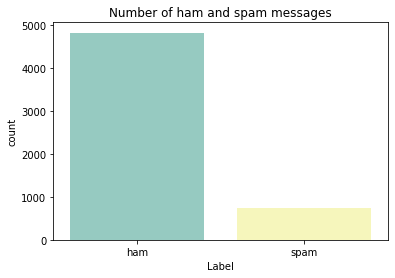

In [20]:
sns.countplot(dataFrame.v1,palette='Set3')
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [21]:
X = dataFrame.v2
Y = dataFrame.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

3)Split into training and test data.

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [24]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len)


In [25]:
sequences_matrix.shape

(4736, 150)

In [26]:
sequences_matrix.ndim

2

In [27]:
sequences_matrix = np.reshape(sequences_matrix,(4736,150,1))

In [28]:
sequences_matrix.ndim #3d shape verification to proceed to RNN LSTM

3


4)Create model for RNN

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [30]:
model = Sequential()

5)Add Layers

In [31]:
model.add(Embedding(max_words,50,input_length=max_len))

In [32]:
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))

In [33]:
model.add(LSTM(units=64,return_sequences=True))

In [34]:
model.add(LSTM(units=64,return_sequences=True))

In [35]:
model.add(LSTM(units=64))

In [36]:
model.add(Dense(units = 256,activation = 'relu'))

In [37]:
model.add(Dense(units = 1,activation = 'sigmoid'))

6)Compile the model

In [38]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

7)Fit the model on the training data.

In [39]:
fitModel = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_split=0.2)
fitModel

Epoch 1/5
30/30 [==============================] - 48s 1s/step - loss: 0.4599 - accuracy: 0.8400 - val_loss: 0.3495 - val_accuracy: 0.8840
Epoch 2/5
30/30 [==============================] - 37s 1s/step - loss: 0.2570 - accuracy: 0.9105 - val_loss: 0.0925 - val_accuracy: 0.9715
Epoch 3/5
30/30 [==============================] - 42s 1s/step - loss: 0.0788 - accuracy: 0.9789 - val_loss: 0.0671 - val_accuracy: 0.9778
Epoch 4/5
30/30 [==============================] - 38s 1s/step - loss: 0.0473 - accuracy: 0.9873 - val_loss: 0.0703 - val_accuracy: 0.9821
Epoch 5/5
30/30 [==============================] - 32s 1s/step - loss: 0.0340 - accuracy: 0.9902 - val_loss: 0.0625 - val_accuracy: 0.9821


8)Save the model

In [40]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f7445d39050>>

9)Evaluate the model on test set data.

In [41]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)

In [42]:
accuracy = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 6s 145ms/step - loss: 0.0596 - accuracy: 0.9844


In [43]:
l = accuracy[0]
a =accuracy[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.060
  Accuracy: 0.984


Accuracy and Loss Graph

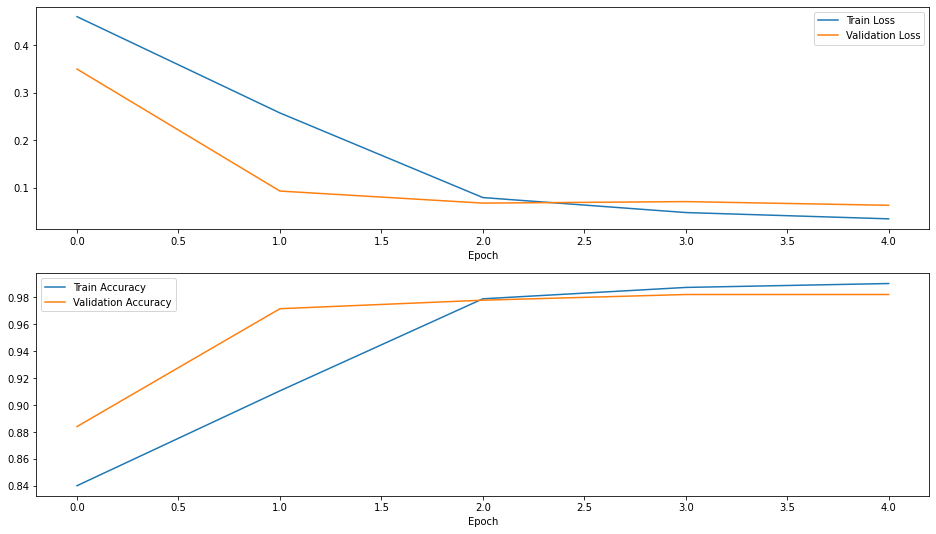

In [46]:
results = pd.DataFrame({"Train Loss": fitModel.history['loss'], "Validation Loss": fitModel.history['val_loss'],
              "Train Accuracy": fitModel.history['accuracy'], "Validation Accuracy": fitModel.history['val_accuracy']
             })
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])
ax[0].set_xlabel("Epoch")
ax[1].set_xlabel("Epoch")
plt.show()